# Place cell analyisis

In [6]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [7]:
import sys
sys.path.append('../src') # Add src folder to path.
import place_cells as pc # Import my place_cell functions from /src.

In [8]:
# load data

# Data path and name for animal 1
animal1_data_folder = Path(r"Z:\davide\2p_data\441406_fiano")
animal1 = '441406_fiano'

# Data path and name for animal 2
animal2_data_folder = Path(r"Z:\davide\2p_data\441394_ribolla")
animal2 = '441394_ribolla'

# List of data_paths and animal names
animal_folders = [animal1_data_folder, animal2_data_folder]
animal_names = [animal1, animal2]

# Enable plot saving and where to save
save_plots = True
output_folder = Path('./imgs')
output_folder.mkdir(exist_ok=True,parents=True)

# List of session dates for animal 1
animal1_session_dates = ['20230309', '20230317', '20230323', '20230328', '20230331']

# List of session dates for animal 2
animal2_session_dates = ['20230315', '20230324', '20230331', '20230404', '20230405']

# List of session dates for all animals
all_session_dates = [animal1_session_dates, animal2_session_dates]

# Create an empty DataFrame for the place cells
results_df = pd.DataFrame(columns=['Animal', 'Session Date', 'Environment', 'Number of Place Cells', 'Fraction'])

*Ratemaps processing all sessions: Environment onset*

In [10]:
# Loop over animals
for animal_folder, animal_name, session_dates in zip(animal_folders, animal_names, all_session_dates):
    # Process the sessions for the current animal
    results_df = pc.process_sessions(animal_folder, animal_name, session_dates, results_df, save_plots, output_folder)

In [11]:
# Print the final results dataframe
print(results_df)

            Animal Session Date Environment Number of Place Cells  Fraction
0     441406_fiano     20230309           1                    34  0.118056
1     441406_fiano     20230309           2                   107  0.371528
2     441406_fiano     20230309           3                   153  0.531250
3     441406_fiano     20230317           1                     7  0.050725
4     441406_fiano     20230317           2                    74  0.536232
5     441406_fiano     20230317           3                   105  0.760870
6     441406_fiano     20230323           1                   223  0.888446
7     441406_fiano     20230323           2                   111  0.444000
8     441406_fiano     20230323           3                   228  0.912000
9     441406_fiano     20230328           1                   121  0.683616
10    441406_fiano     20230328           2                   119  0.676136
11    441406_fiano     20230328           3                   141  0.787709
12    441406

In [12]:
# Specify the desired path and filename
df_output_path = Path('../data/final/place_cells.csv')

# Export the DataFrame to the specified path and filename
results_df.to_csv(df_output_path, index=False)

*Boxplot by place cell fraction (env)*

             count       mean        std       min        25%        50%  \
Environment                                                                
1             10.0  27.197768  28.571147  5.072464   9.640925  15.728105   
2             10.0  44.324519  25.504850  6.542056  23.103984  47.726316   
3             10.0  61.308377  35.096837  1.587302  32.385024  77.428953   

                   75%        max  
Environment                        
1            27.515383  88.844622  
2            62.215321  85.333333  
3            89.139910  96.456693  


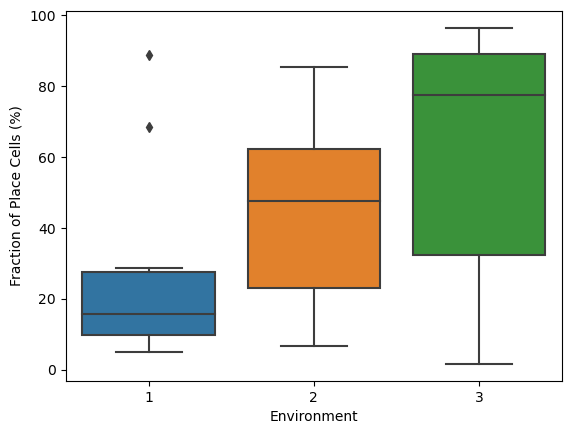

            Animal  Session Date  Environment  Number of Place Cells  \
0     441406_fiano      20230309            1                     34   
18  441394_ribolla      20230324            1                     10   
15  441394_ribolla      20230315            1                     11   
12    441406_fiano      20230331            1                     45   
24  441394_ribolla      20230404            1                     36   
9     441406_fiano      20230328            1                    121   
21  441394_ribolla      20230331            1                     73   
3     441406_fiano      20230317            1                      7   
27  441394_ribolla      20230405            1                     20   
6     441406_fiano      20230323            1                    223   
7     441406_fiano      20230323            2                    111   
25  441394_ribolla      20230404            2                    128   
22  441394_ribolla      20230331            2                   

In [18]:
output_folder = Path('./imgs')
output_folder.mkdir(exist_ok=True,parents=True)

save_folder = output_folder.joinpath('place_cell_distribution')
save_folder.mkdir(exist_ok=True, parents=True)

# Read the CSV file into a DataFrame
file_path = Path('../data/final/place_cells.csv')
df = pd.read_csv(file_path)

# Convert the 'Fraction' column to percentages
df['Fraction'] = df['Fraction'] * 100

# Create the boxplot using seaborn with 'Fraction' column as 'y'
sns.boxplot(x='Environment', y='Fraction', data=df)

# Set the labels for the x and y axes
plt.xlabel('Environment')
plt.ylabel('Fraction of Place Cells (%)')

# Calculate the statistical values for each environment
statistics = df.groupby('Environment')['Fraction'].describe()

# Display the statistics as a table
print(statistics)
# Save the statistics as a CSV file at the desired location
save_path = Path('../data/final/place_cell_boxplot_statistics.csv')
statistics.to_csv(save_path)

# Save the plot
plt.savefig(save_folder.joinpath('place_cell_distribution.png'))

# Display the plot
plt.show()

# Sort the DataFrame based on the 'Environment' column
df_sorted = df.sort_values('Environment')

# Display the sorted dataframe
print(df_sorted)

*Ratemaps processing all sessions: Reward zone onset*

In [14]:
# Loop over animals
for animal_folder, animal_name, session_dates in zip(animal_folders, animal_names, all_session_dates):
    # Process the sessions for the current animal
    results_df = pc.process_sessions_rz(animal_folder, animal_name, session_dates, results_df, save_plots, output_folder)

In [15]:
# Print the final results dataframe
print(results_df)

            Animal Session Date Environment Number of Place Cells  Fraction
0     441406_fiano     20230309           1                    34  0.118056
1     441406_fiano     20230309           2                   107  0.371528
2     441406_fiano     20230309           3                   153  0.531250
3     441406_fiano     20230317           1                     7  0.050725
4     441406_fiano     20230317           2                    74  0.536232
5     441406_fiano     20230317           3                   105  0.760870
6     441406_fiano     20230323           1                   223  0.888446
7     441406_fiano     20230323           2                   111  0.444000
8     441406_fiano     20230323           3                   228  0.912000
9     441406_fiano     20230328           1                   121  0.683616
10    441406_fiano     20230328           2                   119  0.676136
11    441406_fiano     20230328           3                   141  0.787709
12    441406

In [16]:
# Specify the desired path and filename
df_output_path = Path('../data/final/place_cells_rz.csv')

# Export the DataFrame to the specified path and filename
results_df.to_csv(df_output_path, index=False)

*Boxplot by place cell fraction (rz)*

             count       mean        std       min        25%        50%  \
Environment                                                                
1             20.0  31.119668  29.924258  5.072464   9.009346  18.236542   
2             20.0  38.073892  28.628779  2.234637  12.590862  35.096213   
3             20.0  47.192266  34.641637  1.587302  13.937570  46.127717   

                   75%        max  
Environment                        
1            46.767735  90.157480  
2            65.113872  91.333333  
3            79.730386  96.456693  


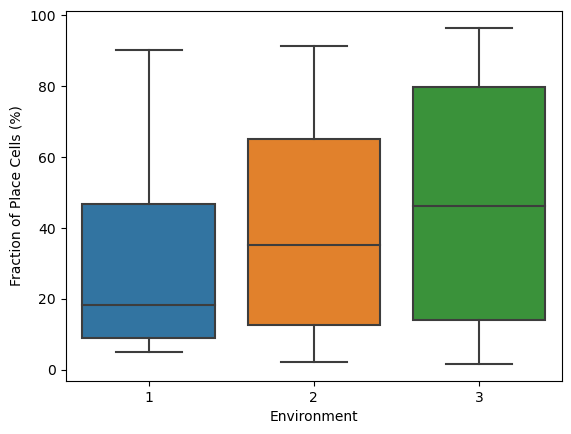

            Animal  Session Date  Environment  Number of Place Cells  \
0     441406_fiano      20230309            1                     34   
45  441394_ribolla      20230315            1                     11   
39    441406_fiano      20230328            1                     21   
36    441406_fiano      20230323            1                     20   
33    441406_fiano      20230317            1                     34   
48  441394_ribolla      20230324            1                     18   
30    441406_fiano      20230309            1                     21   
27  441394_ribolla      20230405            1                     20   
24  441394_ribolla      20230404            1                     36   
42    441406_fiano      20230331            1                     95   
51  441394_ribolla      20230331            1                    229   
18  441394_ribolla      20230324            1                     10   
15  441394_ribolla      20230315            1                   

In [19]:
output_folder = Path('./imgs')
output_folder.mkdir(exist_ok=True,parents=True)

save_folder = output_folder.joinpath('place_cell_distribution')
save_folder.mkdir(exist_ok=True, parents=True)

# Read the CSV file into a DataFrame
file_path = Path('../data/final/place_cells_rz.csv')
df = pd.read_csv(file_path)

# Convert the 'Fraction' column to percentages
df['Fraction'] = df['Fraction'] * 100

# Create the boxplot using seaborn with 'Fraction' column as 'y'
sns.boxplot(x='Environment', y='Fraction', data=df)

# Set the labels for the x and y axes
plt.xlabel('Environment')
plt.ylabel('Fraction of Place Cells (%)')

# Calculate the statistical values for each environment
statistics = df.groupby('Environment')['Fraction'].describe()

# Display the statistics as a table
print(statistics)
# Save the statistics as a CSV file at the desired location
save_path = Path('../data/final/place_cell_boxplot_statistics_rz.csv')
statistics.to_csv(save_path)

# Save the plot
plt.savefig(save_folder.joinpath('place_cell_distribution_rz.png'))

# Display the plot
plt.show()

# Sort the DataFrame based on the 'Environment' column
df_sorted = df.sort_values('Environment')

# Display the sorted dataframe
print(df_sorted)